In [1]:
import decaymaker
import awkward
import uproot_methods
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline

In [2]:
def signaldecay(root, res_one, res_two, res_tre,leafs):
    while True:
        particle_info = {
            '_': {'mass': root, 'width': None},
            'C': {'mass': res_one, 'width': res_one*0.1},
            'T': {'mass': res_two, 'width': res_two*0.1},
            'W': {'mass': res_tre, 'width': res_tre*0.1},
            'J': {'mass': leafs[0], 'width': None},
            'B': {'mass': leafs[1], 'width': None},
            'S': {'mass': leafs[2], 'width': None},
        }

        decay_tree = {
            '_': ['J','J','J','J','J','J','J','J','J','J'],
        }
        final_state = ['_']
        yield final_state, decay_tree, particle_info

def backgrounddecay(root, res_one, res_two, res_tre,leafs):
    while True:
        particle_info = {
            '_': {'mass': root, 'width': None},
            'C': {'mass': res_one, 'width': res_one*0.1},
            'T': {'mass': res_two, 'width': res_two*0.1},
            'W': {'mass': res_tre, 'width': res_tre*0.1},
            'J': {'mass': leafs[0], 'width': None},
            'B': {'mass': leafs[1], 'width': None},
            'S': {'mass': leafs[2], 'width': None},
        }

        decay_tree = {
            '_': [{'C': [{'T': [{'W': ['J','J']},'J']},'J','J']},{'C': [{'T': [{'W': ['J','J']},'J']},'J','J']}],
        }
        final_state = ['_']
        yield final_state, decay_tree, particle_info
        

In [3]:
def make_torch_batch(N):
    batch = decaymaker.make_batch(signaldecay(1000,300,175,80,[1,1,1]), shuffle = True, N = N)
    batch = uproot_methods.TLorentzVectorArray.from_ptetaphi(batch.pt,batch.eta,batch.phi,batch.e)
    sX = np.stack([batch.t.regular(),batch.x.regular(),batch.y.regular(),batch.z.regular()],axis=-1)
    sY = 1*np.ones(len(sX))

    batch = decaymaker.make_batch(backgrounddecay(1000,300,175,80,[1,1,1]), shuffle = True, N = N)
    batch = uproot_methods.TLorentzVectorArray.from_ptetaphi(batch.pt,batch.eta,batch.phi,batch.e)
    bX = np.stack([batch.t.regular(),batch.x.regular(),batch.y.regular(),batch.z.regular()],axis=-1)
    bY = 0*np.ones(len(bX))

    X = np.concatenate([sX,bX])
    Y = np.concatenate([sY,bY])
    
    X = torch.as_tensor(X, dtype = torch.float)
    Y = torch.as_tensor(Y, dtype = torch.float)
    return X,Y    




In [4]:
from colalola import CoLaLoLa

torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
tensor(0.6929, grad_fn=<BinaryCrossEntropyBackward>)
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
warn
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
warn
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP
warn
torch.Size([1000, 10, 4]) XX
torch.Size([1000, 1]) PP


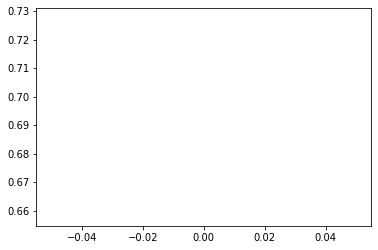

In [5]:
model = CoLaLoLa(10,30)
opt = torch.optim.Adam(model.parameters())
losses = []

for i in range(400):
    model.train()
    opt.zero_grad()

    X,Y = make_torch_batch(500)
    P = model(X)
    P,Y = P,Y.reshape(-1,1)
    
    loss = torch.nn.functional.binary_cross_entropy(P, Y)
    losses.append(loss)
    if i % 25 == 0:
        print(loss)
        plt.plot(losses)
        plt.show()
    loss.backward()
    opt.step()

In [ ]:
plt.imshow(model.cola.w_combo.data.numpy())

In [ ]:
X,Y = make_torch_batch(5000)
P = model(X)
_P = P.data.numpy()
_Y = Y.data.numpy()
plt.hist(_P[_Y==0], bins = np.linspace(0,1,51), density = True, histtype = 'step');
plt.hist(_P[_Y==1], bins = np.linspace(0,1,51), density = True, histtype = 'step');
plt.semilogy()

In [ ]:
w = model.cola.w_combo.data.numpy()

In [ ]:
plt.imshow(w)

In [ ]:
plt.hist(X.data.numpy()[Y==0,:,1].ravel(),bins = 100);

In [ ]:
X.data.numpy()[Y==0,:,1]

In [ ]:
X,Y = make_torch_batch(5000)

In [ ]:
np.unique(X[Y==1].data.numpy()[:,:,0].ravel()).shape

In [ ]:
_,b,_ = plt.hist(X[Y==1].data.numpy()[:,:,0].ravel(),bins = 100);
plt.hist(X[Y==0].data.numpy()[:,:,0].ravel(),bins = b);

In [ ]:
X.pt